In [1]:
import math
import numpy as np
from ROOT import gROOT, gDirectory, gPad, gSystem, gStyle
from ROOT import TCanvas, TFile, TProfile, TNtuple, TF1, TH1F, TH2F, THStack, TLegend, TGraphErrors, TMultiGraph, TText, TLatex
from ROOT import TGaxis, TCut
from ROOT import kWhite, kBlack, kGray, kRed, kGreen, kBlue, kYellow, kMagenta, kCyan, kOrange, kSpring, kTeal, kAzure, kViolet, kPink
# %jsroot on

Welcome to JupyROOT 6.18/00


In [2]:
gStyle.SetOptFit(0)
gStyle.SetOptStat(0)  
gStyle.SetOptTitle(1)
gStyle.SetTitleBorderSize(0)
gStyle.SetTitleStyle(0)
gStyle.SetMarkerSize(1)
gStyle.SetTitleX(0.2) 
gStyle.SetTitleY(0.9)
gStyle.SetPadLeftMargin(0.2)

In [3]:
# file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/default/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian.root")

# file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_info/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian.root")
file = TFile.Open("/home/ilc/yokugawa/macros/QQbar250/analysis/kaon_info/bbbar_Kgamma35_15161_cuts12_250GeV_eL_btag1_0.8_btag2_0.8_nbins40_noCheat_adrian_corrected.root")



In [4]:
def makePretty(p, color):
    p.SetStats(0)
    p.SetMarkerColor(color)
    p.SetFillColor(color)
    p.SetMarkerStyle(1)
    p.SetMarkerSize(0.2)
    p.SetTitle("")

In [5]:
def makePrettyTGE(tge, color):
    tge.SetMarkerColor(color)
 #   tge.SetMarkerStyle(21)
 #   tge.SetMarkerSize(0.5)
    tge.SetLineColor(color)
    tge.SetTitle("")

In [6]:
kaon_dEdx_truth = file.Get("kaon_dEdx_truth")
proton_dEdx_truth = file.Get("proton_dEdx_truth")
pion_dEdx_truth = file.Get("pion_dEdx_truth")
electron_dEdx_truth = file.Get("electron_dEdx_truth")
muon_dEdx_truth = file.Get("muon_dEdx_truth")

kaon_dEdx_corr = file.Get("kaon_dEdx_corr")
proton_dEdx_corr = file.Get("proton_dEdx_corr")
pion_dEdx_corr = file.Get("pion_dEdx_corr")
electron_dEdx_corr = file.Get("electron_dEdx_corr")
muon_dEdx_corr = file.Get("muon_dEdx_corr")

kaon_dEdx_cos_truth = file.Get("kaon_dEdx_cos_truth")
proton_dEdx_cos_truth = file.Get("proton_dEdx_cos_truth")
pion_dEdx_cos_truth = file.Get("pion_dEdx_cos_truth")
electron_dEdx_cos_truth = file.Get("electron_dEdx_cos_truth")
muon_dEdx_cos_truth = file.Get("muon_dEdx_cos_truth")

makePretty(kaon_dEdx_truth,kRed)
makePretty(proton_dEdx_truth,kGreen)
makePretty(pion_dEdx_truth,kBlue)
makePretty(electron_dEdx_truth,kBlack)
makePretty(muon_dEdx_truth,kGray)

makePretty(kaon_dEdx_corr,kRed)
makePretty(proton_dEdx_corr,kGreen)
makePretty(pion_dEdx_corr,kBlue)
makePretty(electron_dEdx_corr,kBlack)
makePretty(muon_dEdx_corr,kGray)

makePretty(kaon_dEdx_cos_truth,kRed)
makePretty(proton_dEdx_cos_truth,kGreen)
makePretty(pion_dEdx_cos_truth,kBlue)
makePretty(electron_dEdx_cos_truth,kBlack)
makePretty(muon_dEdx_cos_truth,kGray)

## dEdx vs. cos θ

In [7]:
c1 = TCanvas("c1", "c_dEdx",0,0,550,500);

In [8]:
pion_dEdx_cos_truth.GetXaxis().SetTitle("cos#theta");
pion_dEdx_cos_truth.GetYaxis().SetTitle("#frac{dE}{dx} [MeV]");

pion_dEdx_cos_truth.Draw("box")
#proton_dEdx_cos_truth.Draw("psame")
kaon_dEdx_cos_truth.Draw("box same")
#electron_dEdx_cos_truth.Draw("psame")
#muon_dEdx_cos_truth.Draw("psame")

In [9]:
legendMean = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean.SetFillColor(kWhite)
legendMean.SetBorderSize(0)
legendMean.SetTextSize(0.03)
legendMean.AddEntry(kaon_dEdx_cos_truth,"K","fp")
#legendMean.AddEntry(proton_dEdx_cos_truth,"p","fp")
legendMean.AddEntry(pion_dEdx_cos_truth,"#pi","fp")
#legendMean.AddEntry(electron_dEdx_cos_truth,"e","fp")
#legendMean.AddEntry(muon_dEdx_cos_truth,"#mu","fp")
legendMean.Draw()

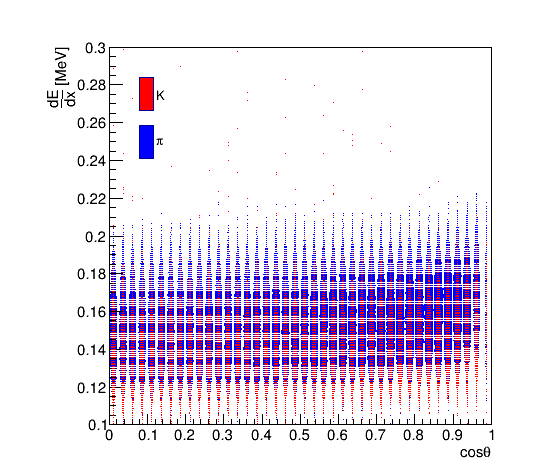

In [10]:
c1.Draw()

### Mean of the each bin

In [11]:
def CosMeanGraph(itr, hist, x, y, ex, ey):
    
    for i in range(itr):
        proj  = hist.ProjectionY("proj_kaon",i,i+1)
        x[i]  = hist.GetXaxis().GetBinCenter(i+1)
        y[i]  = proj.GetMean()
        ex[i] = hist.GetXaxis().GetBinWidth(i+1)/2.
        ey[i] = proj.GetRMS()

In [12]:
kaon_cos = np.empty(200, dtype=float)
kaon_mean_dEdx = np.empty(200, dtype=float)
e_kaon_cos = np.empty(200, dtype=float)
e_kaon_mean_dEdx = np.empty(200, dtype=float)
cosbinkaon = kaon_dEdx_cos_truth.GetNbinsX()

CosMeanGraph(cosbinkaon, kaon_dEdx_cos_truth, kaon_cos, kaon_mean_dEdx, e_kaon_cos, e_kaon_mean_dEdx)

pion_cos = np.empty(200, dtype=float)
pion_mean_dEdx = np.empty(200, dtype=float)
e_pion_cos = np.empty(200, dtype=float)
e_pion_mean_dEdx = np.empty(200, dtype=float)
cosbinpion = pion_dEdx_cos_truth.GetNbinsX()

CosMeanGraph(cosbinpion, pion_dEdx_cos_truth, pion_cos, pion_mean_dEdx, e_pion_cos, e_pion_mean_dEdx)

In [13]:
kaonproj = TGraphErrors(cosbinkaon, kaon_cos, kaon_mean_dEdx, e_kaon_cos, e_kaon_mean_dEdx)
pionproj = TGraphErrors(cosbinpion, pion_cos, pion_mean_dEdx, e_pion_cos, e_pion_mean_dEdx)

makePrettyTGE(kaonproj,kRed)
makePrettyTGE(pionproj,kBlue)

In [14]:
fkaonCos= TF1("fkaonCos","[0]+[1]*TMath::Power(x,[2])",0,1)
fkaonCos.SetLineColor(kRed)
fpionCos= TF1("fpionCos","[0]+[1]*TMath::Power(x,[2])",0,1)
fpionCos.SetLineColor(kBlue)

kaonproj.Fit(fkaonCos,"REMS")
pionproj.Fit(fpionCos,"REMS")

 FCN=0.0619654 FROM MINOS     STATUS=PROBLEMS      179 CALLS         883 TOTAL
                     EDM=5.49378e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.41072e-01   5.77035e-03   0.00000e+00  -1.40790e+03
   2  p1           1.14476e-02   8.87190e-03  -0.00000e+00   5.75897e+04
   3  p2           2.21280e+00   4.67875e+00   4.67875e+00   9.09121e-06
 FCN=0.0537806 FROM MINOS     STATUS=SUCCESSFUL    417 CALLS        1168 TOTAL
                     EDM=2.3337e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.50652e-01   5.62470e-03   3.02513e-04   5.70752e-02
   2  p1           1.38018e-02   1.11825e-02  -2.72246e-04   1.19336e-01
   3  p2           2.92009e+00

In [15]:
c1_51 = TCanvas("c1_51", "c_dEdx",0,0,550,500)
pionproj.GetXaxis().SetTitle("|cos#theta|");
pionproj.GetYaxis().SetTitle("#frac{dE}{dx} [MeV]");

pionproj.Draw("ALP")
fpionCos.Draw("same")
kaonproj.Draw("same")
fkaonCos.Draw("same")

In [16]:
legendMean2 = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean2.SetFillColor(kWhite)
legendMean2.SetBorderSize(0)
legendMean2.SetTextSize(0.03)
legendMean2.AddEntry(fkaonCos,"K","l")
#legendMean2.AddEntry(proton_dEdx_truth,"p","fp")
legendMean2.AddEntry(fpionCos,"#pi","l")
#legendMean2.AddEntry(electron_dEdx_truth,"e","fp")
#legendMean2.AddEntry(muon_dEdx_truth,"#mu","fp")
legendMean2.Draw()

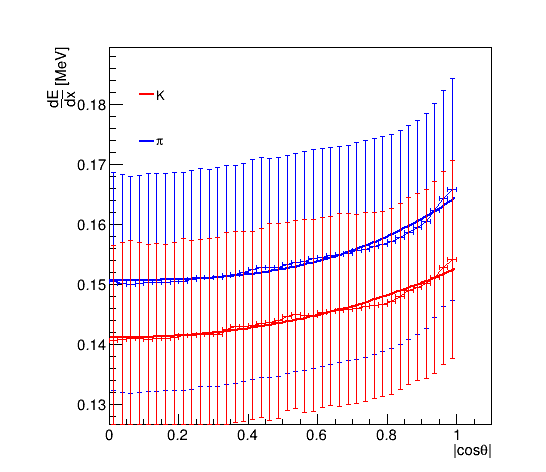

In [17]:
c1_51.Draw()

## dEdx vs. Momentum

### Truth

In [18]:
c2 = TCanvas("c2", "c_dEdx",0,0,550,500)

In [19]:
pion_dEdx_truth.GetXaxis().SetTitle("p [GeV]");
pion_dEdx_truth.GetYaxis().SetTitle("#frac{dE}{dx} [MeV/cm]");
pion_dEdx_truth.SetTitle("")

gPad.SetLogx()

pion_dEdx_truth.Draw("p")
proton_dEdx_truth.Draw("psame")
kaon_dEdx_truth.Draw("psame")
electron_dEdx_truth.Draw("psame")
muon_dEdx_truth.Draw("psame")

In [20]:
legendMean2 = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean2.SetFillColor(kWhite)
legendMean2.SetBorderSize(0)
legendMean2.SetTextSize(0.03)
legendMean2.AddEntry(kaon_dEdx_truth,"K","fp")
legendMean2.AddEntry(proton_dEdx_truth,"p","fp")
legendMean2.AddEntry(pion_dEdx_truth,"#pi","fp")
legendMean2.AddEntry(electron_dEdx_truth,"e","fp")
legendMean2.AddEntry(muon_dEdx_truth,"#mu","fp")
legendMean2.Draw()

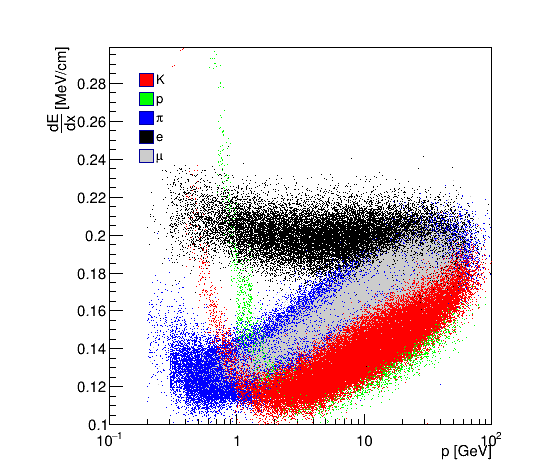

In [21]:
c2.Draw()

### Corrected

In [22]:
c2_1 = TCanvas("c2_1", "c_dEdx",0,0,550,500)

In [23]:
pion_dEdx_corr.GetXaxis().SetTitle("p [GeV]");
pion_dEdx_corr.GetYaxis().SetTitle("#frac{dE}{dx} [MeV]");
pion_dEdx_corr.SetTitle("")

gPad.SetLogx()

pion_dEdx_corr.Draw("p")
proton_dEdx_corr.Draw("psame")
kaon_dEdx_corr.Draw("psame")
electron_dEdx_corr.Draw("psame")
muon_dEdx_corr.Draw("psame")

In [24]:
legendMean2 = TLegend(0.25,0.85,0.4,0.65,"","brNDC")
legendMean2.SetFillColor(kWhite)
legendMean2.SetBorderSize(0)
legendMean2.SetTextSize(0.03)
legendMean2.AddEntry(kaon_dEdx_corr,"K","fp")
legendMean2.AddEntry(proton_dEdx_corr,"p","fp")
legendMean2.AddEntry(pion_dEdx_corr,"#pi","fp")
legendMean2.AddEntry(electron_dEdx_corr,"e","fp")
legendMean2.AddEntry(muon_dEdx_corr,"#mu","fp")
legendMean2.Draw()

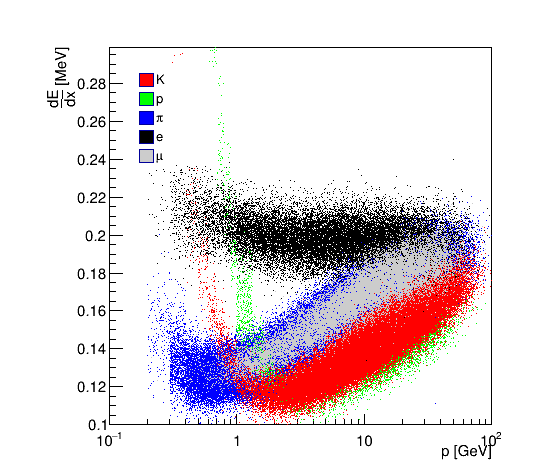

In [25]:
c2_1.Draw()

### Get Selection

In [26]:
pdg_selec = file.Get("pdg_selec")

In [27]:
c3 = TCanvas("c3", "c_pdg",0,0,550,500);

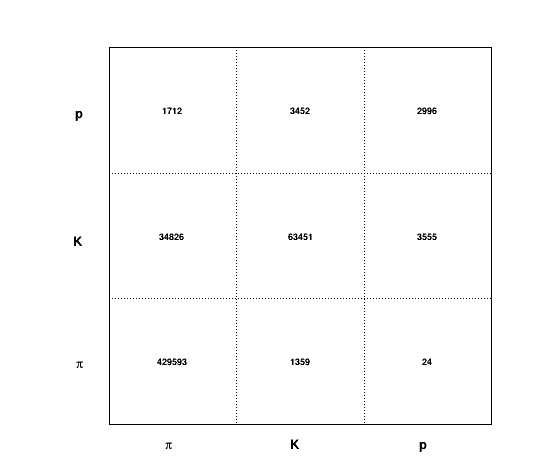

In [28]:
pdg_selec.SetStats(0)
pdg_selec.SetTitle("")
pdg_selec.GetXaxis().SetLabelOffset(99)
pdg_selec.GetYaxis().SetLabelOffset(99)

pdg_selec.SetNdivisions(3, "XY");
pdg_selec.GetXaxis().SetTickLength(0.)
pdg_selec.GetYaxis().SetTickLength(0.)

pdg_selec.Draw("text")

gPad.SetGrid(1,1)

y = gPad.GetUymin() - 0.2*pdg_selec.GetYaxis().GetBinWidth(1)
t = TLatex()
t.SetTextSize(0.03);
t.SetTextAlign(36);

pdgs = ['#pi','K','p']

for i in range(3):
    x = pdg_selec.GetXaxis().GetBinCenter(i+1)
    t.DrawLatex(x,y,pdgs[i])

x = gPad.GetUymin() - 0.2*pdg_selec.GetXaxis().GetBinWidth(1)
t.SetTextAlign(33)

for i in range(3):
    y = pdg_selec.GetYaxis().GetBinCenter(i+1)
    t.DrawLatex(x,y,pdgs[i])
    
c3.Draw()

### some testing ...

In [29]:
kaon_dEdx_cos_truth.Draw("colz")
c4.Draw()

NameError: name 'c4' is not defined

In [ ]:
# kaon_dEdx_cos_corr = TH2F("kaon_dEdx_cos_corr","kaon_dEdx_cos_corr",40,0.,1.0,200,0.1,0.3)
kaon_dEdx_cos_corr = TH2F("kaon_dEdx_cos_corr",";Angle(Rad);dEdx",40,0.,1.6,200,0.1,0.3)

In [ ]:
nbinsX = kaon_dEdx_cos_truth.GetNbinsX()
nbinsY = kaon_dEdx_cos_truth.GetNbinsY()

for binX in range(1,nbinsX+1):
    x_val = kaon_dEdx_cos_truth.GetXaxis().GetBinCenter(binX)
    angle = math.acos(x_val)
    corr  = math.pow(angle,0.07)
    
    for binY in range(1,nbinsY+1):
        y_val = kaon_dEdx_cos_truth.GetYaxis().GetBinCenter(binY)
        
        y_val_corr = y_val * corr
        
        cont  = kaon_dEdx_cos_truth.GetBinContent(binX,binY)
        kaon_dEdx_cos_corr.Fill(angle,y_val_corr,cont)
#         kaon_dEdx_cos_corr.Fill(angle,y_val,cont)
        


In [ ]:
kaon_dEdx_cos_corr.Draw("colz")
c4.Draw()